In [1]:
# collective communication 
# Решить по аналогии интегрирование метода монтекарла методом сэмплирования 
# алгоритм востановления плотности 
# 1)написать 3 штуки генератора данных(точуи на плоскости) рвномерное, гаусиана и два пика 
# 2)написать реализацию метода парзена-розенблата
# 3) На тостовых даннх 2 на 1 востанавливаем плотность в виде картинок PR(h, k) вывести картинку 
# 4) для одного из трех наборов применить оптимизацию ширины окна методом liave one out (LOO)
# 5) Для данных с двумя горбами или более горбами применить EM алгоритм из sklearn (после применения можем напечать параметры на эеран, посмотреть кол-во итераций, нарисовать графики по парамертам в гайде sklearn есть примеры)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

data_size = 1000

# Генерация данных

### Равномерное распределение

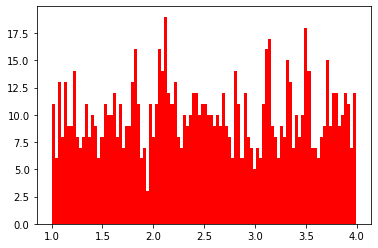

In [5]:
clust_a = np.random.uniform(1, 4, size=data_size)
a_hist = plt.hist(clust_a, bins=100, color='red')

### Гаусиана

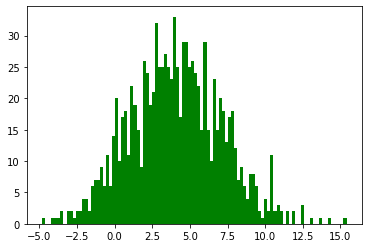

In [6]:
gaus_dist_clustter_a = np.random.normal(-4, 3, size=data_size)

b_hist = plt.hist(gaus_dist_clustter_b, bins=100, color='green')

### Распределение с двумя пиками

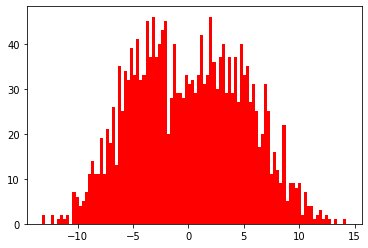

In [8]:
gaus_dist_clustter_b = np.random.normal(4, 3, size=data_size)

gaus_dist = np.hstack((gaus_dist_clustter_a, gaus_dist_clustter_b))
gaus = np.array([gaus_dist_clustter_a, gaus_dist_clustter_b])

a_hist = plt.hist(gaus_dist, bins=100, color='red')

# Реализация алгоритма Парзена Розенблата

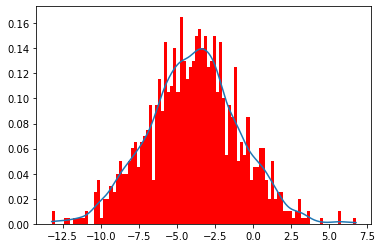

In [9]:
import math

def probability_density(x):
    return 1 / ((2 * math.pi) ** 0.5) * np.exp(-1/2 * (x ** 2))

def EM(x, h, data):
    return sum([probability_density((x - i) / h) for i in data]) / (len(data) * h)


x = np.linspace(min(gaus_dist_clustter_a), max(gaus_dist_clustter_a), len(gaus_dist_clustter_a))

plt.hist(gaus_dist_clustter_a, bins=100, density=True, color='red')
plt.plot(x, EM(x, 0.5, gaus_dist_clustter_a))

### Востанавливаем плотность на тестовых данных

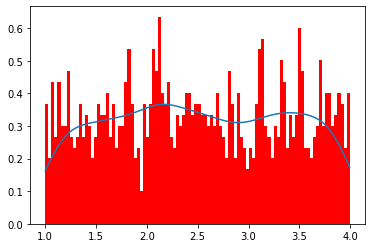

In [13]:
x = np.linspace(min(clust_a), max(clust_a), len(clust_a))

plt.hist(clust_a, bins=100, density=True, color='red')
plt.plot(x, EM(x, 0.2, clust_a))

# Оптимизация ширины окна методом LOO

2497.6330860546823

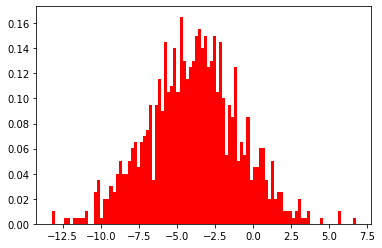

In [14]:
def LOO(data: list, h: float) -> float:
    return -sum([math.log(EM(data[i], h, data)) for i in range(len(data))])

plt.hist(gaus_dist_clustter_a, bins=100, density=True, color='red')
LOO(gaus_dist_clustter_a, 0.5)

# Применение EM алгоритма из sklearn для данных с двумя горбами

(2000, 1)


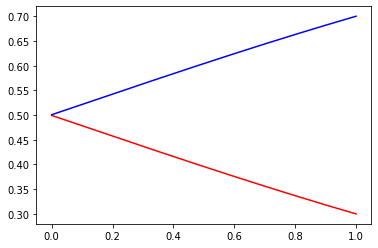

In [15]:
from sklearn.mixture import GaussianMixture

gaus_dist = gaus_dist.reshape(-1, 1)
print(np.array(gaus_dist).shape)
gm = GaussianMixture(n_components=2, random_state=0).fit(gaus_dist)
x = np.linspace(0, 1, 1000)
y_red = gm.predict_proba(np.array(x).reshape(-1, 1))[:,0]
y_blue = gm.predict_proba(np.array(x).reshape(-1, 1))[:,1]
plt.plot(x, y_red, color = 'red')
plt.plot(x, y_blue, color = 'blue')